In [18]:
from pathlib import Path

import polars as pl
import numpy as np
from lifelines.datasets import load_rossi, load_waltons
from lifelines import CoxPHFitter, KaplanMeierFitter, NelsonAalenFitter, ExponentialFitter

In [2]:
data_path = Path("/Users/zacklarsen/Documents/Projects/kaggle-wids-datathon-2020/data/")
competition_path = Path("/Users/zacklarsen/Documents/Projects/kaggle-wids-datathon-2020/")
mlflow_path = Path(competition_path, "mlruns/")
training_v2_path = Path(data_path, "training_v2.csv")

In [3]:
X_train = pl.read_parquet(data_path / "X_train.parquet")
X_test = pl.read_parquet(data_path / "X_test.parquet")
y_train = pl.read_parquet(data_path / "y_train.parquet")
y_test = pl.read_parquet(data_path / "y_test.parquet")

## Example dataset

In [4]:
rossi_dataset = load_rossi()

In [5]:
rossi_dataset

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [6]:
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-10-28 19:05:44 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

In [7]:
df = load_waltons()
df1 = df.iloc[34:55][['T','E']]
df1

,T,E
34,33.0,1
35,54.0,1
36,54.0,1
37,61.0,1
38,61.0,1
39,61.0,0
40,61.0,1
41,61.0,0
42,61.0,1
43,61.0,1


In [10]:
T = df1['T']
E = df1['E']

In [11]:
T

34    33.0
35    54.0
36    54.0
37    61.0
38    61.0
39    61.0
40    61.0
41    61.0
42    61.0
43    61.0
44    61.0
45    61.0
46    61.0
47    61.0
48    69.0
49    69.0
50    69.0
51    69.0
52    69.0
53    69.0
54    69.0
Name: T, dtype: float64

In [12]:
E

34    1
35    1
36    1
37    1
38    1
39    0
40    1
41    0
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    0
Name: E, dtype: int64

In [13]:
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
33.0,0.952381
54.0,0.857143
61.0,0.428571
69.0,0.061224


<Axes: xlabel='timeline'>

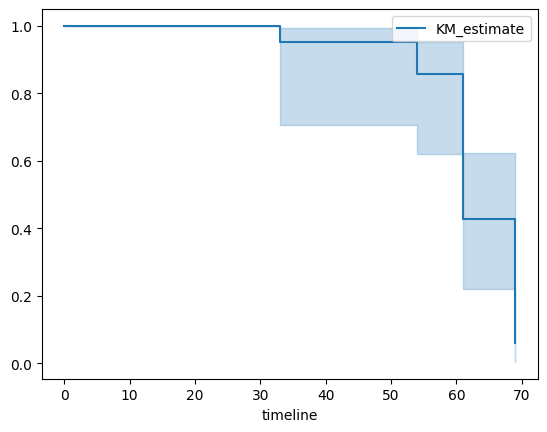

In [14]:
kmf.plot_survival_function()

In [16]:
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(T, event_observed=E)
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
33.0,0.047619
54.0,0.147619
61.0,0.647619
69.0,1.504762


<Axes: xlabel='timeline'>

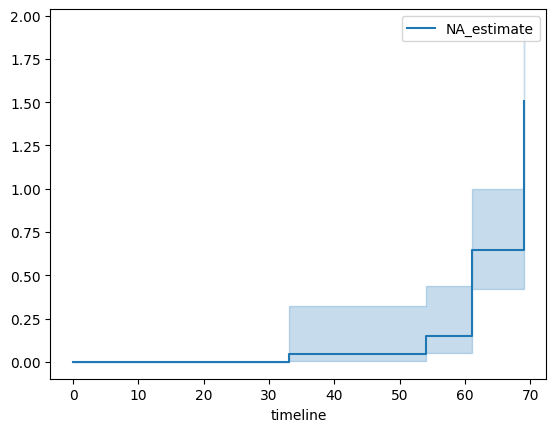

In [17]:
naf.plot_cumulative_hazard()

<Axes: >

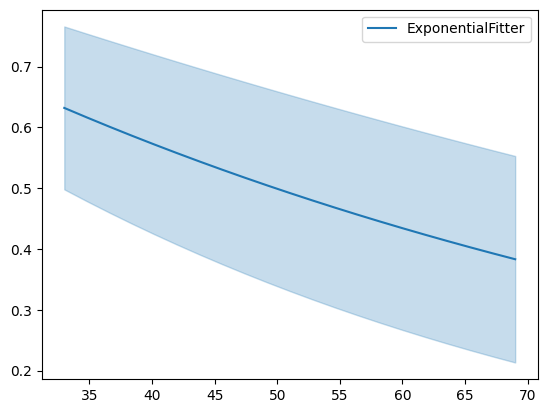

In [19]:
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
exf.plot_survival_function()

In [7]:
X_train.glimpse()

Rows: 73370
Columns: 185
$ encounter_id                  <cat> 59954, 63518, 34401, 71581, 29019, 70076, 63091, 40553, 75009, 94808
$ patient_id                    <cat> 90449, 19384, 20558, 112066, 129440, 97970, 42207, 499, 125636, 104142
$ hospital_id                   <cat> 118, 185, 188, 62, 161, 89, 161, 186, 62, 128
$ age                            <i8> 86, 72, 36, 60, 27, 71, 35, 75, 72, 50
$ bmi                           <f32> 28.168975830078125, 36.63508605957031, 27.459684371948242, 21.97735023498535, 19.960243225097656, 21.312541961669922, 29.34004020690918, 29.1796875, 24.24339485168457, 22.3046875
$ elective_surgery               <u8> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
$ ethnicity                     <cat> Caucasian, Caucasian, African American, Caucasian, Caucasian, Other/Unknown, Hispanic, Caucasian, Caucasian, Caucasian
$ gender                        <cat> M, M, M, M, F, F, F, F, M, F
$ height                        <f32> 170.1999969482422, 170.10000610351562, 162.600006103

In [8]:
y_train.glimpse()

Rows: 73370
Columns: 1
$ hospital_death <u8> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0



In [9]:
X_train.schema

OrderedDict([('encounter_id', Categorical),
             ('patient_id', Categorical),
             ('hospital_id', Categorical),
             ('age', Int8),
             ('bmi', Float32),
             ('elective_surgery', UInt8),
             ('ethnicity', Categorical),
             ('gender', Categorical),
             ('height', Float32),
             ('hospital_admit_source', Categorical),
             ('icu_admit_source', Categorical),
             ('icu_id', Categorical),
             ('icu_stay_type', Categorical),
             ('icu_type', Categorical),
             ('pre_icu_los_days', Float32),
             ('readmission_status', Int8),
             ('weight', Float32),
             ('albumin_apache', Float32),
             ('apache_2_diagnosis', Int16),
             ('apache_3j_diagnosis', Float32),
             ('apache_post_operative', Int8),
             ('arf_apache', Int8),
             ('bilirubin_apache', Float32),
             ('bun_apache', Float32),
             ('c

In [12]:
y_train

hospital_death
u8
0
1
0
0
0
0
0
0
0


In [13]:
data = pl.read_csv(training_v2_path, infer_schema_length=10000, dtypes={"age": pl.Float32}, ignore_errors=True)

In [14]:
data.glimpse()

Rows: 91713
Columns: 186
$ encounter_id                  <i64> 66154, 114252, 119783, 79267, 92056, 33181, 82208, 120995, 80471, 42871
$ patient_id                    <i64> 25312, 59342, 50777, 46918, 34377, 74489, 49526, 50129, 10577, 90749
$ hospital_id                   <i64> 118, 81, 118, 118, 33, 83, 83, 33, 118, 118
$ hospital_death                <i64> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0
$ age                           <f32> 68.0, 77.0, 25.0, 81.0, 19.0, 67.0, 59.0, 70.0, 45.0, 50.0
$ bmi                           <str> '22.73', '27.42', '31.95', '22.64', 'NA', '27.56', '57.45', 'NA', 'NA', '25.71'
$ elective_surgery              <i64> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0
$ ethnicity                     <str> 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', None
$ gender                        <str> 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'M'
$ height                        <str> '180.3', '160', '172.7', '165.1', '188', '

In [15]:
pd_train_df = data.select(pl.col(["patient_id", "age", "weight", "ethnicity", "gender", "hospital_death"])).to_pandas()

In [16]:
pd_train_df.head(5)

,patient_id,age,weight,ethnicity,gender,hospital_death
0,25312,68.0,73.9,Caucasian,M,0
1,59342,77.0,70.2,Caucasian,F,0
2,50777,25.0,95.3,Caucasian,F,0
3,46918,81.0,61.7,Caucasian,F,0
4,34377,19.0,NA,Caucasian,M,0


In [17]:
cph = CoxPHFitter()
cph.fit(pd_train_df, event_col='hospital_death')

KeyError: None

In [18]:
cph.print_summary()

AttributeError: Must call `fit` first.